In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
main_dir = 'data/processed'
file_name = 'clustered_customer_segmentation_data.csv'
file_path = os.path.join(main_dir, file_name)

In [3]:
data = pd.read_csv(file_path) 

In [4]:
data.head()

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,New_York_Young_Adults,New_York_Middle-aged_Adults,Los_Angeles_Young_Adults,...,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Cluster,PCA1,PCA2
0,0.176471,0.639502,0.500000,0.842105,1.0,0.296296,0.333333,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,0.114511,1.263420
1,0.470588,0.333273,0.285714,0.578947,0.0,0.166667,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,-0.936885,-1.130093
2,1.000000,0.090102,0.142857,0.210526,1.0,0.611111,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1.596030,-0.081482
3,0.235294,0.964122,0.857143,0.894737,0.0,0.055556,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,-1.372312,0.988835
4,0.058824,0.279095,0.428571,0.526316,1.0,0.851852,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5,-0.679784,-0.930910


# visualization

In [5]:
# Select the relevant columns for clustering
X = data[['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
        'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level',
        'New_York_Young_Adults', 'New_York_Middle-aged_Adults',
        'Los_Angeles_Young_Adults', 'Los_Angeles_Middle-aged_Adults',
        'Chicago_Young_Adults', 'Chicago_Middle-aged_Adults',
        'San_Francisco_Young_Adults', 'San_Francisco_Middle-aged_Adults',
        'Miami_Young_Adults', 'Miami_Middle-aged_Adults',
        'Houston_Young_Adults', 'Houston_Middle-aged_Adults', 'Gender_Female',
        'Gender_Male', 'City_Chicago', 'City_Houston', 'City_Los Angeles',
        'City_Miami', 'City_New York', 'City_San Francisco',
        'Membership Type_Bronze', 'Membership Type_Gold',
        'Membership Type_Silver', 'PCA1', 'PCA2']].values

labels = data['Cluster'].values

In [6]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

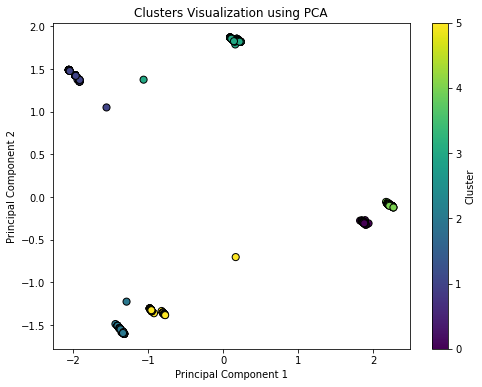

In [7]:
# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.colorbar(label='Cluster')
plt.title("Clusters Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [8]:
tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(X)

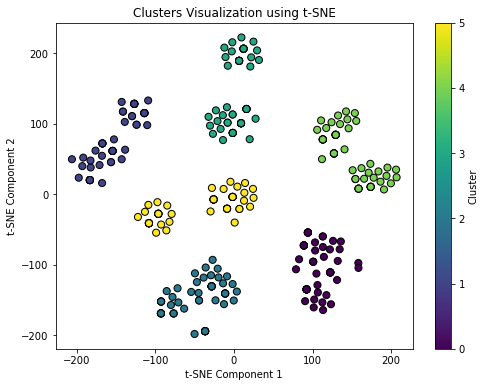

In [9]:
# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.colorbar(label='Cluster')
plt.title("Clusters Visualization using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [10]:
centroids = np.array([X[labels == i].mean(axis=0) for i in np.unique(labels)])

# Print the centroids for each cluster
for idx, centroid in enumerate(centroids):
    print('***********')
    print(f"Cluster {idx} centroid: {centroid}")
    print()

***********
Cluster 0 centroid: [ 0.62981744  0.03253838  0.04064039  0.10163339  0.          0.25478927
  0.03448276  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          1.          0.          0.          1.          0.
  0.          0.          0.          1.          0.          0.
  1.3200303  -0.20673672]

***********
Cluster 1 centroid: [ 0.18356998  0.94561653  0.92857143  0.95190563  0.          0.04022989
  0.33333333  0.          0.          0.          0.          0.
  0.          0.98275862  0.01724138  0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          1.          0.          1.          0.
 -1.4034892   1.01064044]

***********
Cluster 2 centroid: [ 0.4775673   0.35580233  0.33414044  0.61730598  0.          0.11613308
  0.04519774  0.          0.          0.01694915  0.98305085  0.
  0.          0.          0.          0.      